<a href="https://colab.research.google.com/github/jyimz/Python/blob/main/MNIST_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


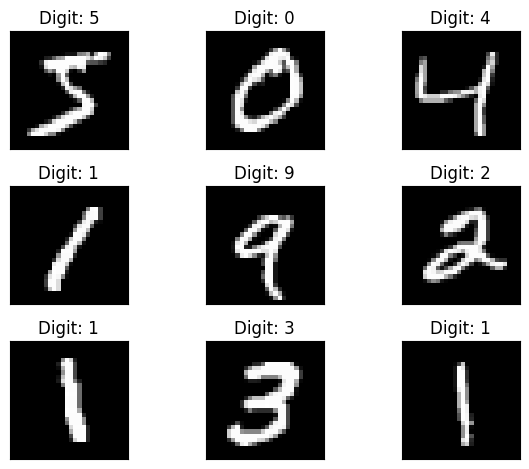

In [ ]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images with labels
fig = plt.figure(layout='tight')
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    # display the label
    plt.title(f"Digit: {trainy[i]}")
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Load the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# Reshape dataset to have a single channel
trainX = trainX.reshape((60000, 28, 28, 1))
testX = testX.reshape((10000, 28, 28, 1))
# One hot encode target values
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# # Load the dataset
# trainX, trainY, testX, testY = load_dataset()

# # Define the model
# model = define_model()

# # Show the model summary
# model.summary()

# Train the model
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY), verbose=2)


Epoch 1/10
1875/1875 - 22s - loss: 41.7736 - accuracy: 0.2081 - val_loss: 0.5041 - val_accuracy: 0.8469 - 22s/epoch - 12ms/step
Epoch 2/10
1875/1875 - 24s - loss: 0.4548 - accuracy: 0.8593 - val_loss: 0.4635 - val_accuracy: 0.8588 - 24s/epoch - 13ms/step
Epoch 3/10
1875/1875 - 21s - loss: 0.4140 - accuracy: 0.8724 - val_loss: 0.4216 - val_accuracy: 0.8733 - 21s/epoch - 11ms/step
Epoch 4/10
1875/1875 - 21s - loss: 0.3984 - accuracy: 0.8777 - val_loss: 0.3702 - val_accuracy: 0.8916 - 21s/epoch - 11ms/step
Epoch 5/10
1875/1875 - 20s - loss: 0.3919 - accuracy: 0.8793 - val_loss: 0.3783 - val_accuracy: 0.8885 - 20s/epoch - 11ms/step
Epoch 6/10
1875/1875 - 21s - loss: 0.3874 - accuracy: 0.8823 - val_loss: 0.3767 - val_accuracy: 0.8850 - 21s/epoch - 11ms/step
Epoch 7/10
1875/1875 - 22s - loss: 0.3856 - accuracy: 0.8813 - val_loss: 0.3731 - val_accuracy: 0.8890 - 22s/epoch - 12ms/step
Epoch 8/10
1875/1875 - 20s - loss: 0.3824 - accuracy: 0.8828 - val_loss: 0.3773 - val_accuracy: 0.8870 - 20s/e

In [ ]:
# Retrieve the accuracy and validation accuracy
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")


Final Training Accuracy: 88.33%
Final Validation Accuracy: 89.02%


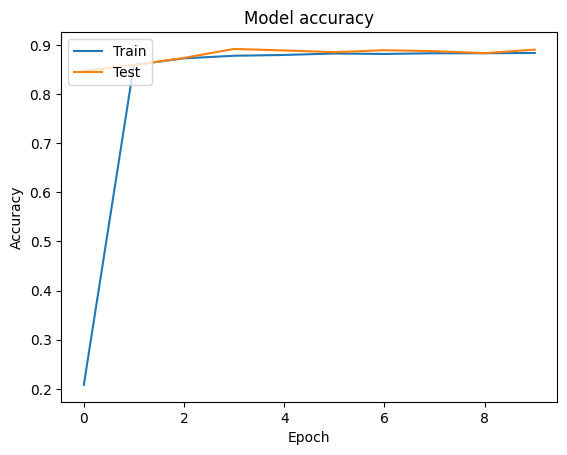

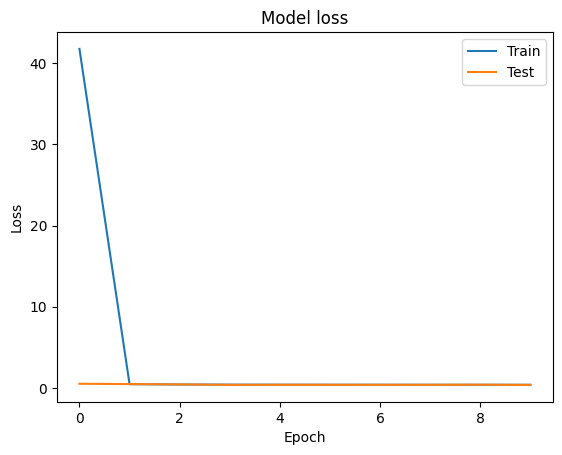

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(testX, testY, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


313/313 - 2s - loss: 0.3619 - accuracy: 0.8902 - 2s/epoch - 7ms/step
Test Loss: 0.3618754744529724
Test Accuracy: 89.02%
